#Mnist t-sne


In [38]:

# google drive. so we have to monunt
from google.colab import drive # /content/drive/MyDrive/project/MachineLearning/dataset/mnist.pkl
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# load data. I load 
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn as sns
import pandas as pd


In [40]:
def load_data(dataset): # data load : HDLMS source code utilize
    data_dir, data_file = os.path.split(dataset)
    if data_dir == "" and not os.path.isfile(dataset):
        # Check if dataset is in the data directory.
        new_path = os.path.join(
            os.path.split('/content/drive/MyDrive/project/MachineLearning/dataset/')[0],
            dataset
        )
        if os.path.isfile(new_path) or data_file == 'mnist.pkl.gz':
            dataset = new_path

    if (not os.path.isfile(dataset)) and data_file == 'mnist.pkl.gz':
        from six.moves import urllib
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('... loading data')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
    # train_set, valid_set, test_set format: tuple(input, target)
    # input is a numpy.ndarray of 2 dimensions (a matrix)
    # where each row corresponds to an example. target is a
    # numpy.ndarray of 1 dimension (vector) that has the same length as
    # the number of rows in the input. It should give the target
    # to the example with the same index in the input.

    return train_set, valid_set, test_set

In [41]:
if __name__ == '__main__':
    train_set, val_set, test_set = load_data('mnist.pkl.gz')

    train_x, train_y = train_set
    val_x, val_y = val_set
    test_x, test_y = test_set
    
    print(train_x.shape)
    print(train_y.shape)

... loading data
(50000, 784)
(50000,)


In [42]:
rint = np.random.randint(train_x.shape[0], size = 25000) # 25000
npTrainX = train_x[rint, :]
npTrainY = train_y[rint]
print(npTrainX.shape)
print(npTrainY.shape)

(25000, 784)
(25000,)


In [43]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_dataPCA = StandardScaler().fit_transform(npTrainX)
print(standardized_dataPCA.shape)

(25000, 784)


In [44]:
sample_data = standardized_dataPCA

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of co-variance matrix = ", covar_matrix.shape)

The shape of co-variance matrix =  (784, 784)


In [45]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [46]:
# projecting the original data sample on the plane 
# formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 25000)  =  (2, 25000)


In [47]:
print(new_coordinates.T)

[[  0.71812296 -17.758635  ]
 [ -3.513871    -4.7395754 ]
 [  2.3110342    7.81177   ]
 ...
 [  7.2471466    1.4241349 ]
 [  3.2294035    5.252682  ]
 [ -1.6513014   -3.8208804 ]]


In [48]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates,  npTrainY)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0       0.718123     -17.758635    0.0
1      -3.513871      -4.739575    6.0
2       2.311034       7.811770    1.0
3      -0.114541       5.883377    7.0
4       1.701144       6.298849    8.0


In [49]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

      
        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

Shape of X: (25000, 784)
Shape of transformed X: (25000, 2)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


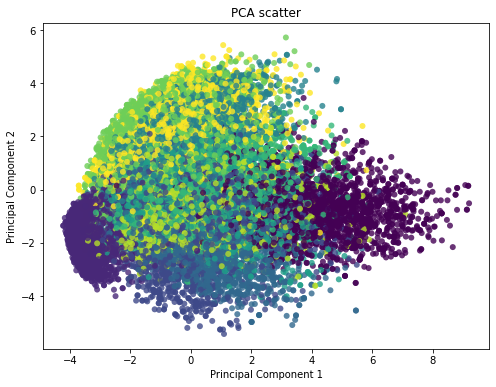

In [50]:
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt

    # Project the data onto the 2 primary principal components
    pca = PCA(2)
    pca.fit(npTrainX)
    X_projected = pca.transform(npTrainX)

    print("Shape of X:", npTrainX.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1 = X_projected[:, 0]
    x2 = X_projected[:, 1]
    #labels = np.unique(train_y)
    #pca_df = pd.DataFrame({'x': X_projected[:, 0], 'y':X_projected[:, 1], 'classes':labels})
    plt.figure(figsize= (8, 6))
    plt.scatter(
        x1, x2, c=npTrainY, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 10)
    )
    plt.title("PCA scatter")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


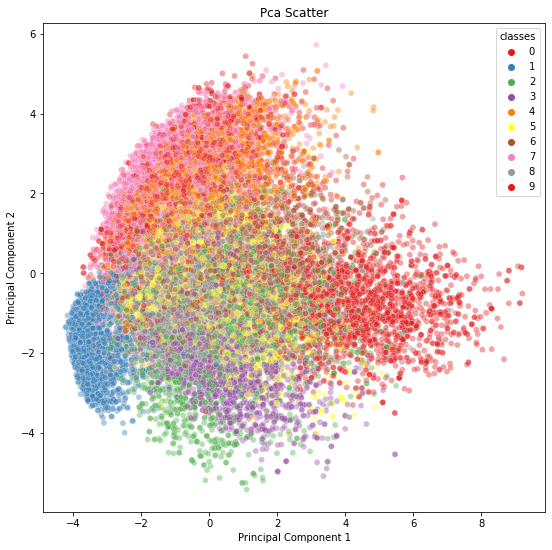

In [51]:
pcadf = pd.DataFrame({'x': X_projected[:, 0], 'y':X_projected[:, 1], 'classes':npTrainY})

plt.figure(figsize=(9, 9))
sns.scatterplot( x = 'x', y = 'y', hue = 'classes', palette = sns.color_palette("Set1", 10), 
                data = pcadf, legend = "full", alpha = 0.4)

plt.title("Pca Scatter")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<Figure size 576x432 with 0 Axes>

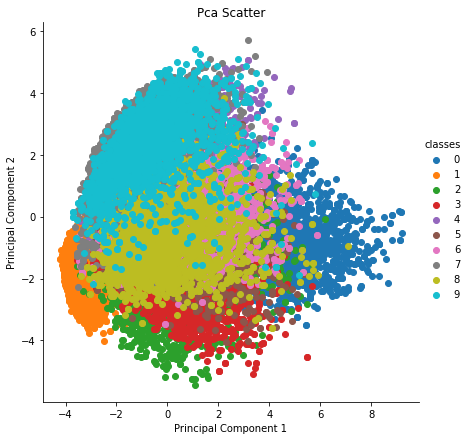

In [52]:
plt.figure(figsize=(8, 6))
sns.FacetGrid(pcadf, hue = "classes", size = 6).map(plt.scatter, "x", "y").add_legend()
plt.title("Pca Scatter")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [53]:

standardized_data_SNE = StandardScaler().fit_transform(npTrainX)
print(standardized_data_SNE.shape)

(25000, 784)


In [54]:
sample_data_SNE = standardized_data_SNE

In [57]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# default perplexity 30
tsne = TSNE(n_components=2, perplexity= 30).fit_transform(sample_data_SNE)

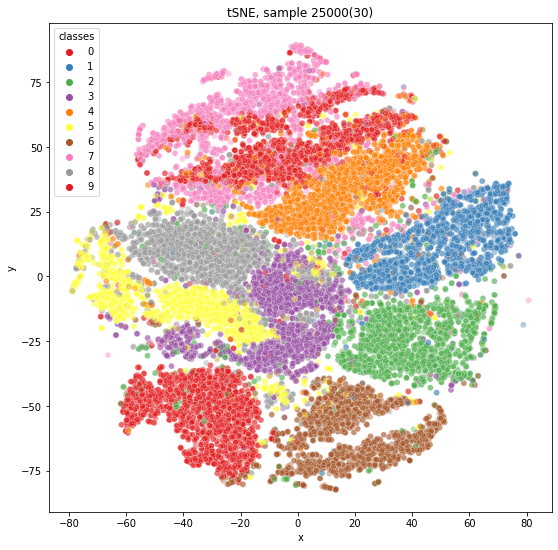

In [58]:
tsne_df = pd.DataFrame({'x': tsne[:, 0], 'y':tsne[:, 1], 'classes':npTrainY})

plt.figure(figsize=(9, 9))
sns.scatterplot(
    x = 'x', y = 'y',
    hue = 'classes',
    palette = sns.color_palette("Set1", 10),
    data = tsne_df,
    legend = "full",
    alpha = 0.4
)

plt.title("tSNE, sample 25000(30)")

plt.show()

In [59]:
# perplexity 10
tsne = TSNE(n_components=2, perplexity= 10).fit_transform(sample_data_SNE)

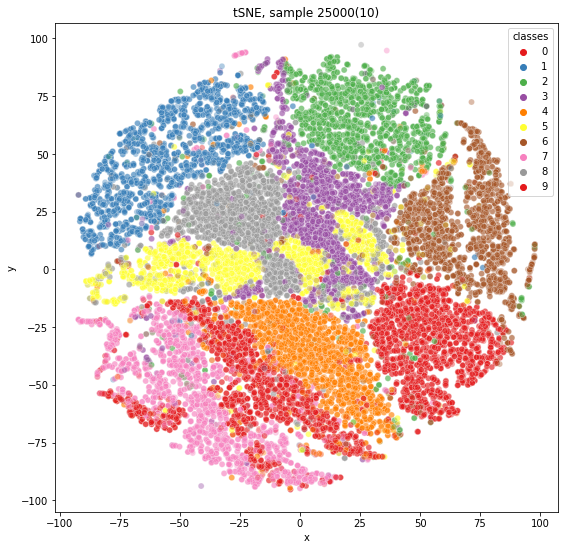

In [60]:
tsne_df = pd.DataFrame({'x': tsne[:, 0], 'y':tsne[:, 1], 'classes':npTrainY})

plt.figure(figsize=(9, 9))
sns.scatterplot(
    x = 'x', y = 'y',
    hue = 'classes',
    palette = sns.color_palette("Set1", 10),
    data = tsne_df,
    legend = "full",
    alpha = 0.4
)

plt.title("tSNE, sample 25000(10)")

plt.show()

In [61]:
# perplexity 50
tsne = TSNE(n_components=2, perplexity= 50).fit_transform(sample_data_SNE)

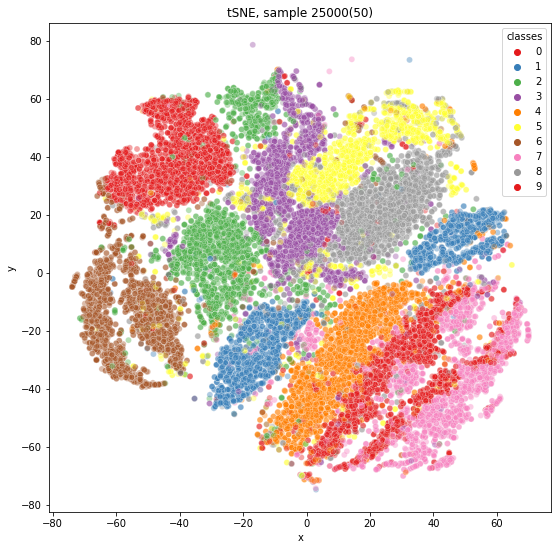

In [62]:
tsne_df = pd.DataFrame({'x': tsne[:, 0], 'y':tsne[:, 1], 'classes':npTrainY})

plt.figure(figsize=(9, 9))
sns.scatterplot(
    x = 'x', y = 'y',
    hue = 'classes',
    palette = sns.color_palette("Set1", 10),
    data = tsne_df,
    legend = "full",
    alpha = 0.4
)

plt.title("tSNE, sample 25000(50)")

plt.show()

In [16]:
# sample data 5000
rint = np.random.randint(train_x.shape[0], size = 5000)
npTrainX = train_x[rint, :]
npTrainY = train_y[rint]
print(npTrainX.shape)
print(npTrainY.shape)

(5000, 784)
(5000,)


In [17]:

standardized_data = StandardScaler().fit_transform(npTrainX)
print(standardized_data.shape)

(5000, 784)


In [18]:
sample_data = standardized_data

In [24]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity= 30).fit_transform(sample_data)

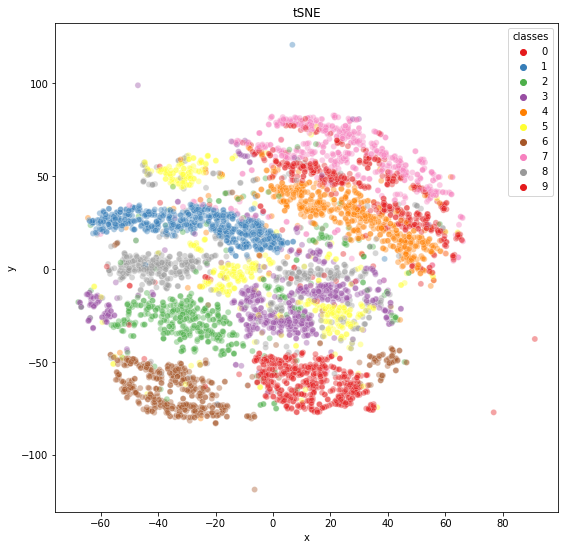

In [25]:
tsne_df = pd.DataFrame({'x': tsne[:, 0], 'y':tsne[:, 1], 'classes':npTrainY})

plt.figure(figsize=(9, 9))
sns.scatterplot(
    x = 'x', y = 'y',
    hue = 'classes',
    palette = sns.color_palette("Set1", 10),
    data = tsne_df,
    legend = "full",
    alpha = 0.4
)

plt.title("tSNE")

plt.show()

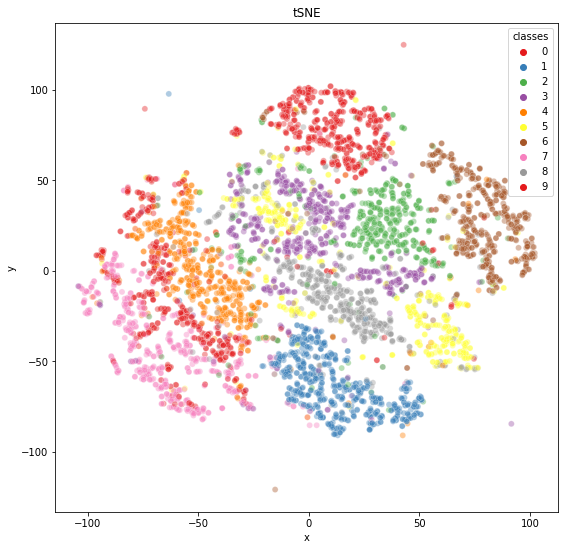

In [26]:
tsne = TSNE(n_components=2, perplexity = 10).fit_transform(sample_data)
tsne_df = pd.DataFrame({'x': tsne[:, 0], 'y':tsne[:, 1], 'classes':npTrainY})

plt.figure(figsize=(9, 9))
sns.scatterplot(
    x = 'x', y = 'y',
    hue = 'classes',
    palette = sns.color_palette("Set1", 10),
    data = tsne_df,
    legend = "full",
    alpha = 0.4
)

plt.title("tSNE")

plt.show()

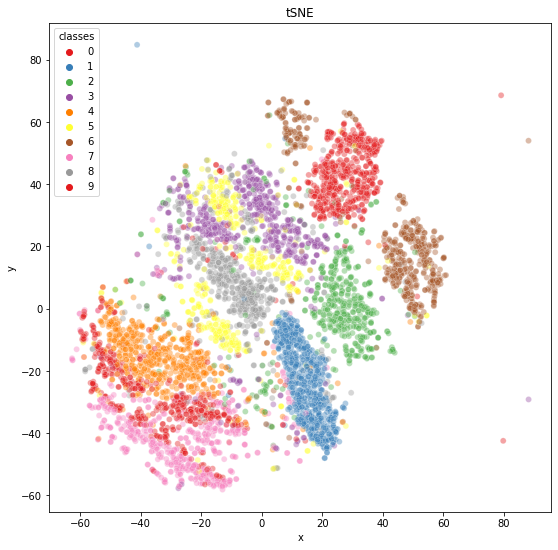

In [27]:
tsne = TSNE(n_components=2, perplexity = 50).fit_transform(sample_data)
tsne_df = pd.DataFrame({'x': tsne[:, 0], 'y':tsne[:, 1], 'classes':npTrainY})

plt.figure(figsize=(9, 9))
sns.scatterplot(
    x = 'x', y = 'y',
    hue = 'classes',
    palette = sns.color_palette("Set1", 10),
    data = tsne_df,
    legend = "full",
    alpha = 0.4
)

plt.title("tSNE")

plt.show()

In [53]:
# 1000개
data1000 = train_x[0:1000, :]
labels1000 = train_y[0:1000]

In [54]:
model = TSNE(n_components=2, random_state= 0)
tsne_data = model.fit_transform(data1000)
tsne_data = np.vstack((tsne_data.T, labels1000)).T

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


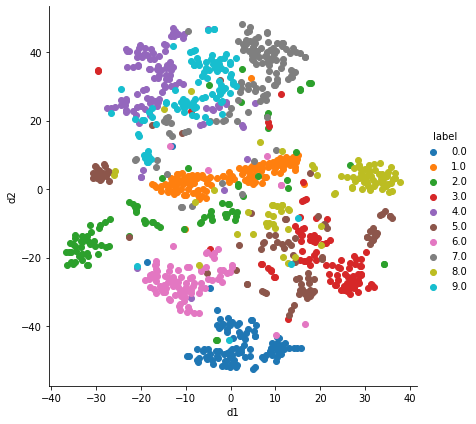

In [55]:
tsne_df2 = pd.DataFrame(data = tsne_data, columns = ("d1", "d2", "label"))
sns.FacetGrid(tsne_df2, hue = "label", size = 6).map(plt.scatter, "d1", "d2").add_legend()
plt.show()

In [56]:
tsne_df2.head()

,d1,d2,label
0,18.609949,-26.209654,5.0
1,0.385292,-46.797890,0.0
2,-20.796772,27.640759,4.0
3,-11.928262,-0.857376,1.0
4,-7.177743,31.218868,9.0


In [ ]:
from sklearn.manifold import TSNE
# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
tsne_data = model.fit_transform(data_1000)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=(“Dim_1”, “Dim_2”, “label”))
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue=”label”, size=6).map(plt.scatter, ‘Dim_1’, ‘Dim_2’).add_legend()
plt.show()